<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_code_kata/blob/master/mnist_cnn_32_32_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

X_train,X_test=np.divide(X_train,255.0),np.divide(X_test,255.0)

y_train,y_test=np.asarray(y_train).astype('float32').reshape((-1,1)),np.asarray(y_test).astype('float32').reshape((-1,1))
y_train,y_test=tf.one_hot(y_train,10),tf.one_hot(y_test,10)
y_train,y_test=np.array(y_train),np.array(y_test)
y_train,y_test=y_train.reshape(-1,10),y_test.reshape(-1,10)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train,X_test=X_train.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1)

In [4]:
model=Sequential(
    name='model_mnist'
)

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

model.build(input_shape=X_train.shape)

In [5]:
model.summary()

Model: "model_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (60000, 28, 28, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (60000, 14, 14, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (60000, 14, 14, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (60000, 7, 7, 32)         0         
_________________________________________________________________
flatten (Flatten)            (60000, 1568)             0         
_________________________________________________________________
dense (Dense)                (60000, 10)               15690     
Total params: 25,258
Trainable params: 25,258
Non-trainable params: 0
___________________________________________________

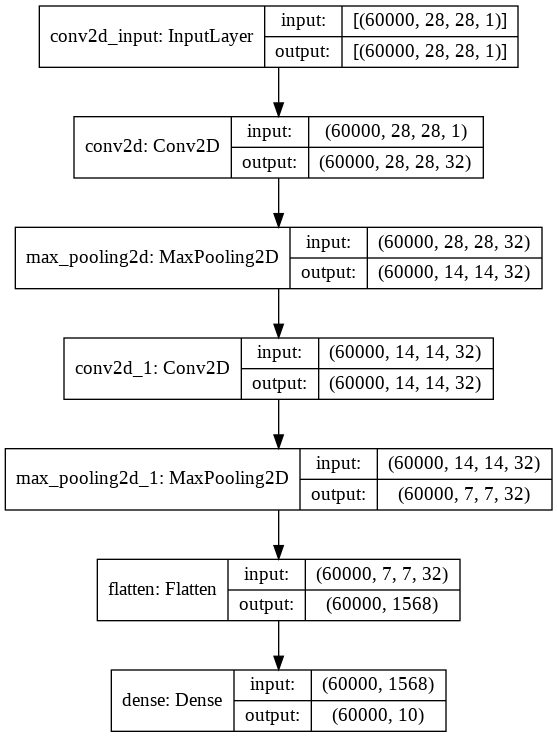

In [6]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.fit(X_train,y_train,batch_size=128,epochs=5)

Epoch 1/5
469/469 [==============================] - 43s 90ms/step - loss: 0.6623 - accuracy: 0.8160
Epoch 2/5
469/469 [==============================] - 42s 89ms/step - loss: 0.0866 - accuracy: 0.9730
Epoch 3/5
469/469 [==============================] - 42s 89ms/step - loss: 0.0623 - accuracy: 0.9814
Epoch 4/5
469/469 [==============================] - 41s 88ms/step - loss: 0.0493 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 41s 88ms/step - loss: 0.0420 - accuracy: 0.9873


In [9]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0396 - accuracy: 0.9865


[0.039631690829992294, 0.9865000247955322]